# Credit Card Fraud Detection

## Imports

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import sklearn
from sklearn import metrics

## Loading Dataset

In [2]:
# Import and store dataset
credit_card_data = pd.read_csv('/content/drive/My Drive/creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Prep

In [0]:
# Shuffle and randomize data
shuffled_data = credit_card_data.sample(frac=1)

# Change Class column into Class_0 ([1 0] for legit data) and Class_1 ([0 1] for fraudulent data)
# one_hot_data = pd.get_dummies(shuffled_data, columns=['Class'])

# Change all values into numbers between 0 and 1
# normalized_data = (one_hot_data - one_hot_data.min()) / (one_hot_data.max() - one_hot_data.min())

normalized_data = (shuffled_data - shuffled_data.min()) / (shuffled_data.max() - shuffled_data.min())

# # Store just columns V1 through V28 in df_X and columns Class_0 and Class_1 in df_y
# df_X = normalized_data.drop(['Class_0', 'Class_1'], axis=1)
# df_y = normalized_data[['Class_0', 'Class_1']]

df_X = normalized_data.drop(['Class'], axis=1)
df_y = normalized_data[['Class']]

# Convert both data_frames into np arrays of float32
ar_X, ar_y = np.asarray(df_X.values, dtype='float32'), np.asarray(df_y.values, dtype='float32')

# Allocate first 80% of data into training data and remaining 20% into testing data
train_size = int(0.80 * len(ar_X))
(X_train, y_train) = (ar_X[:train_size], ar_y[:train_size])
(X_test, y_test) = (ar_X[train_size:], ar_y[train_size:])

In [9]:
# Gets a percent of fraud vs legit transactions (0.0017% of transactions are fraudulent)
count_legit, count_fraud = np.unique(credit_card_data['Class'], return_counts=True)[1]
fraud_ratio = float(count_fraud / (count_legit + count_fraud))
print('Percent of fraudulent transactions: ', fraud_ratio)

Percent of fraudulent transactions:  0.001727485630620034


In [9]:
# Applies a logit weighting of 578 (1/0.0017) to fraudulent transactions to cause model to pay more attention to them
weighting = 1 / fraud_ratio
y_train[:, 1] = y_train[:, 1] * weighting
print(weighting)

578.8760162601626


## Model Prep


In [0]:
# Hyperparameters

epochs = 10
batch_size = 1024
learning_rate = 0.001

In [0]:
# Create an empty sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

## Training

In [12]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test,y_test))

Train on 227845 samples, validate on 56962 samples
Epoch 1/10
227845/227845 [==============================] - 18s 78us/sample - loss: 0.0090 - accuracy: 0.9986 - val_loss: 0.0096 - val_accuracy: 0.9989
Epoch 2/10
227845/227845 [==============================] - 17s 74us/sample - loss: 0.0071 - accuracy: 0.9991 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 3/10
227845/227845 [==============================] - 17s 74us/sample - loss: 0.0074 - accuracy: 0.9991 - val_loss: 0.0079 - val_accuracy: 0.9991
Epoch 4/10
227845/227845 [==============================] - 17s 74us/sample - loss: 0.0076 - accuracy: 0.9991 - val_loss: 0.0059 - val_accuracy: 0.9993
Epoch 5/10
227845/227845 [==============================] - 17s 74us/sample - loss: 0.0082 - accuracy: 0.9992 - val_loss: 0.0084 - val_accuracy: 0.9991
Epoch 6/10
227845/227845 [==============================] - 17s 75us/sample - loss: 0.0085 - accuracy: 0.9992 - val_loss: 0.0072 - val_accuracy: 0.9993
Epoch 7/10
227845/227845 [===========

## Model Analysis

In [25]:
 print(np.argmax(y_pred, axis=1))

[0 0 0 ... 0 0 0]


In [16]:
# Test the model
y_pred = model.predict(X_test)
print(y_pred)

[[1.7881393e-07]
 [3.0994415e-06]
 [1.9669533e-06]
 ...
 [8.6426735e-07]
 [9.7518171e-07]
 [5.5037452e-07]]


In [28]:
print(sklearn.metrics.classification_report(y_test, y_pred))

ValueError: ignored

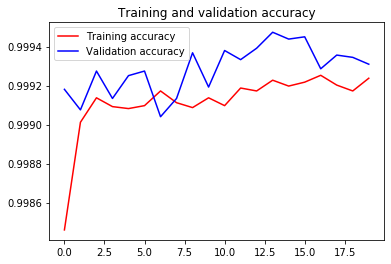

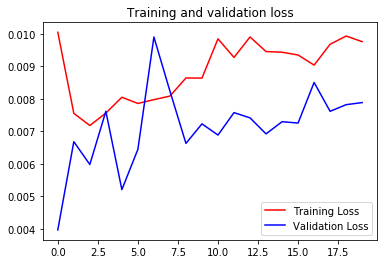

In [13]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()